In [9]:
import pandas as pd 
import numpy as np 

In [10]:
df = pd.read_csv('iris.csv', header = None)
df[4] = df[4].replace({"Iris-setosa": 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
columns = {0:'sepal length', 1:'sepal width', 2:'petal length', 3:'petal width', 4:'species'}
df = df.rename(columns=columns)
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


0 = 'Iris-setosa'
1 = 'Iris-versicolor'
2 = 'Iris-virginica'

In [87]:
from sklearn.linear_model import SGDClassifier

features = [['sepal length','sepal width'], ['sepal length','sepal width','petal length'], ['sepal length','sepal width','petal length','petal width'], ['sepal width','petal length','petal width']]
lossfn = ['hinge','perceptron','log_loss','modified_huber']
Y = df['species']
combinations = {}

for func in lossfn:
    for col in columns:
        clf = SGDClassifier(loss=func)
        X = df[col]
        clf.fit(X, Y)
        combinations[f'function: {func} features: {col}'] = clf.score(X,Y)

combinations


{"function: hinge features: ['sepal length', 'sepal width']": 0.64,
 "function: hinge features: ['sepal length', 'sepal width', 'petal length']": 0.7666666666666667,
 "function: hinge features: ['sepal length', 'sepal width', 'petal length', 'petal width']": 0.96,
 "function: hinge features: ['sepal width', 'petal length', 'petal width']": 0.9533333333333334,
 "function: perceptron features: ['sepal length', 'sepal width']": 0.68,
 "function: perceptron features: ['sepal length', 'sepal width', 'petal length']": 0.68,
 "function: perceptron features: ['sepal length', 'sepal width', 'petal length', 'petal width']": 0.9466666666666667,
 "function: perceptron features: ['sepal width', 'petal length', 'petal width']": 0.9066666666666666,
 "function: log_loss features: ['sepal length', 'sepal width']": 0.68,
 "function: log_loss features: ['sepal length', 'sepal width', 'petal length']": 0.7933333333333333,
 "function: log_loss features: ['sepal length', 'sepal width', 'petal length', 'peta

In [88]:
import matplotlib.pyplot as plt
from collections import defaultdict

featureStr = [str(feature) for feature in features]
functionComparison = defaultdict(list)
featureComparison = defaultdict(list)
for key, value in combinations.items():
    for function in lossfn:
        if function in key:
            functionComparison[function].append(value)
    for combination in featureStr:
        if combination in key:
            featureComparison[combination].append(value)

functionComparison


defaultdict(list,
            {'hinge': [0.64, 0.7666666666666667, 0.96, 0.9533333333333334],
             'perceptron': [0.68,
              0.68,
              0.9466666666666667,
              0.9066666666666666],
             'log_loss': [0.68, 0.7933333333333333, 0.96, 0.96],
             'modified_huber': [0.76,
              0.8866666666666667,
              0.6733333333333333,
              0.96]})

/var/folders/33/bl49qxgs5pdcf5v5sr9ffjtr0000gn/T/ipykernel_23799/1747715900.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(featureStr, rotation=45, ha="right")


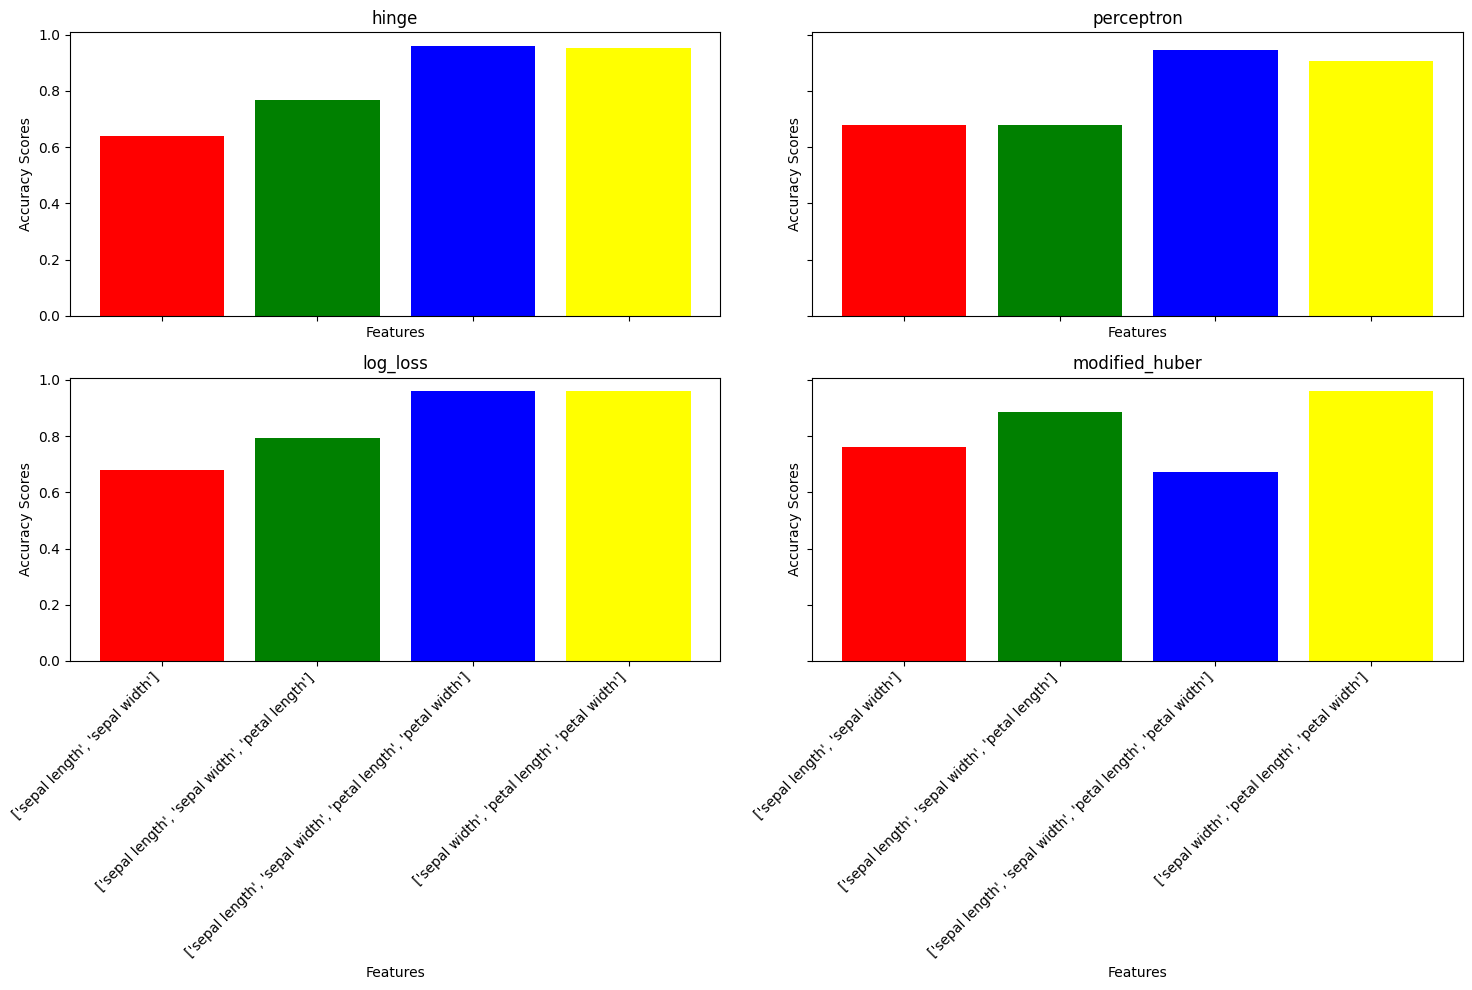

In [89]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize= (15,10), sharex=True, sharey=True)

axes = axs.flatten()

for ax, function in zip(axes.flat, lossfn):
        scores = functionComparison[function]
        ax.bar(featureStr, scores, color=['red','green','blue','yellow'])
        ax.set_xlabel('Features')
        ax.set_ylabel("Accuracy Scores")
        ax.set_title(function)
        ax.set_xticklabels(featureStr, rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [90]:
functionAverages = {}
for function, values in functionComparison.items():
    length = len(values)
    average = sum(values)/length
    functionAverages[function] = average

featureAverages = {}
for function, values in featureComparison.items():
    length = len(values)
    average = sum(values)/length
    featureAverages[function] = average

featureAverages

{"['sepal length', 'sepal width']": 0.69,
 "['sepal length', 'sepal width', 'petal length']": 0.7816666666666667,
 "['sepal length', 'sepal width', 'petal length', 'petal width']": 0.885,
 "['sepal width', 'petal length', 'petal width']": 0.945}

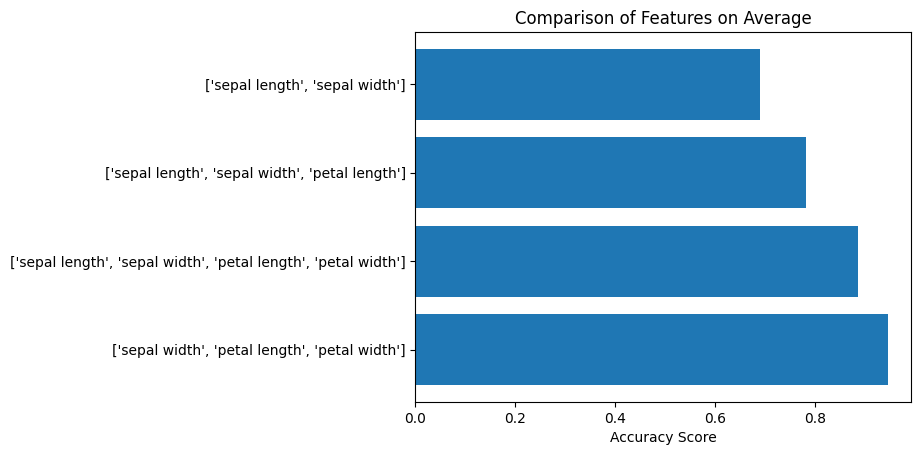

In [91]:

fig, ax = plt.subplots()

# Example data
people = featureAverages.keys()
y_pos = np.arange(len(featureAverages.keys()))
performance = featureAverages.values()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Score')
ax.set_title('Comparison of Features on Average')

plt.show()

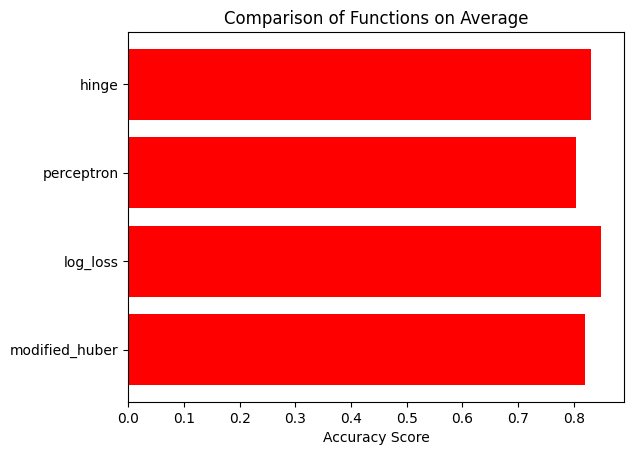

In [92]:

fig, ax = plt.subplots()

# Example data
people = functionAverages.keys()
y_pos = np.arange(len(functionAverages.keys()))
performance = functionAverages.values()

ax.barh(y_pos, performance, align='center', color='red')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Score')
ax.set_title('Comparison of Functions on Average')

plt.show()

# Description & Making Sense of Results
> When looking at the graph with 4 bar graphs, generally when you add more features, the accuracy improves (aside from modified huber function) which 
> makes sense since it gives the model more information to work with. However, when looking at the averages of the scores for each features, we can see > that removing the first feature (which is sepal length) aided in improving the score. It's plausible that having that feature actually hurts the model > and makes it harder to find patterns as accurately. In terms of how the functions compare with each other, looking at the average values for each function, there isn't much of a difference across them - Log_loss does seem to do the best though. 
## Resources used:
- for-loop with subplots: https://saturncloud.io/blog/creating-subplots-in-for-loop-with-matplotlib-a-guide/
- creating multiple bar graphs: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 
- Adaline 22k sample code
- horizontal bar graph: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py 
## People Discussed Assignment with:
- Pretam Chowdhury 